In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

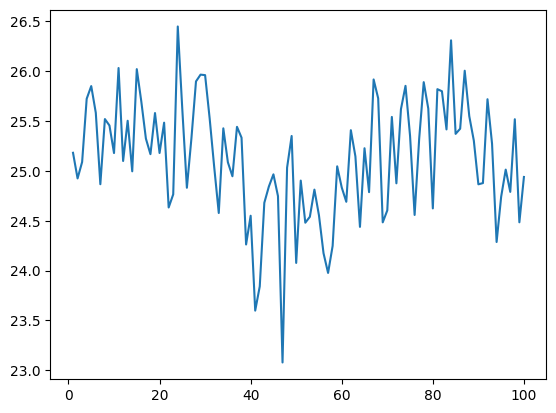

In [3]:
np.random.seed(182)

days  = np.arange(1,101)
temperature = 25 + 0.5 *  np.sin(0.1*days) + np.random.normal(0,0.5,size=100)

plt.plot(days,temperature)
plt.show()

In [4]:
p = 3

X =[]
y = []

for i in range(len(temperature)-p):
    X.append(temperature[i:i+p])
    y.append(temperature[i+p])

X = np.array(X)
y = np.array(y)

print(X.shape)
print(y.shape)

(97, 3)
(97,)


In [5]:
X_train = X[:80]
X_test = X[80:]
y_train = y[:80]
y_test = y[80:]

In [7]:
X_train_with_bias = np.c_[np.ones(X_train.shape[0]),X_train]
X_test_with_bias = np.c_[np.ones(X_test.shape[0]),X_test]

coeff = np.linalg.lstsq(X_train_with_bias,y_train,rcond=None)[0]
print(coeff)

[10.36153868  0.29757698 -0.08728726  0.37726841]


In [9]:
y_pred = X_test_with_bias @ coeff
mse = mean_squared_error(y_test,y_pred)
print(mse)

0.21713134375598786


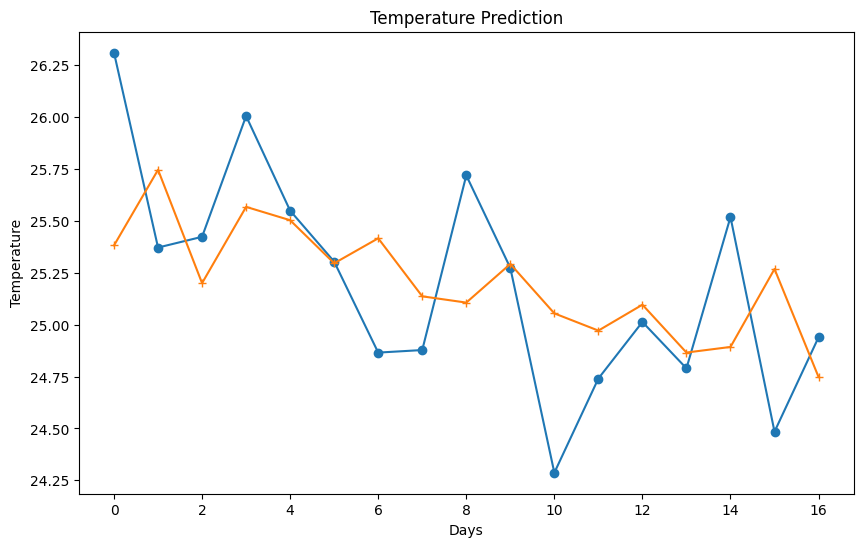

In [12]:
plt.figure(figsize=(10,6))

plt.plot(range(len(y_test)),y_test,label="Actual",marker="o")
plt.plot(range(len(y_pred)),y_pred,label="Predicted",marker="+")

plt.xlabel("Days")
plt.ylabel("Temperature")
plt.title("Temperature Prediction")
plt.show()

In [ ]:
#AR(1) vs markov chain

In [14]:
X_arr1 = temperature[:-1].reshape(-1,1)
y_arr1 = temperature[1:]

In [15]:
train_X_arr1 = X_arr1[:80]
train_y_arr1 = y_arr1[:80]

test_X_arr1 = X_arr1[80:]
test_y_arr1 = y_arr1[80:]

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_X_arr1,train_y_arr1)

LinearRegression()

In [17]:
y_pred_arr1 = model.predict(test_X_arr1)
mse = mean_squared_error(y_pred_arr1,test_y_arr1)
print(mse)

0.2343436817353426


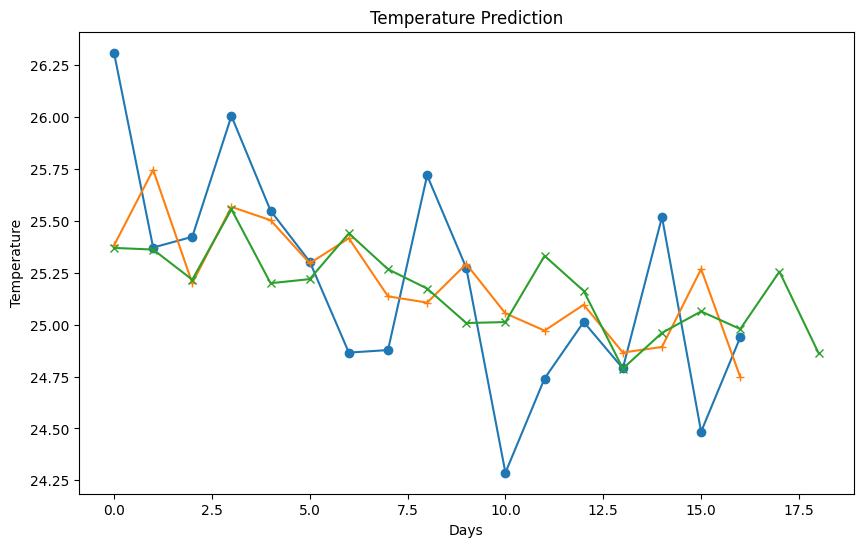

In [23]:
plt.figure(figsize=(10,6))

plt.plot(range(len(y_test)),y_test,label = "Actual",marker="o")
plt.plot(range(len(y_pred)),y_pred,label = "Predicted AR(3)",marker="+")
plt.plot(range(len(y_pred_arr1)),y_pred_arr1,label = "Predicted AR(1)",marker="x")

plt.xlabel("Days")
plt.ylabel("Temperature")
plt.title("Temperature Prediction")
plt.show()

In [24]:
discrete_temp = np.round(temperature).astype(int)

In [25]:
from collections import defaultdict

transition_counts = defaultdict(lambda: defaultdict(int))

for i in range(len(discrete_temp)-1):
  transition_counts[discrete_temp[i]][discrete_temp[i+1]] += 1

In [26]:
for i,j in transition_counts.items():
  print(i,j)

25 defaultdict(<class 'int'>, {np.int64(25): 32, np.int64(26): 17, np.int64(24): 7, np.int64(23): 1})
26 defaultdict(<class 'int'>, {np.int64(26): 12, np.int64(25): 15, np.int64(24): 2})
24 defaultdict(<class 'int'>, {np.int64(25): 9, np.int64(24): 3})
23 defaultdict(<class 'int'>, {np.int64(25): 1})


In [27]:
# convert the transition to probability
transition_matrix = {}

for i,j in transition_counts.items():
  total = sum(j.values())
  for k,v in j.items():
    transition_matrix[(i,k)] = v/total

print(transition_matrix)

{(np.int64(25), np.int64(25)): 0.5614035087719298, (np.int64(25), np.int64(26)): 0.2982456140350877, (np.int64(25), np.int64(24)): 0.12280701754385964, (np.int64(25), np.int64(23)): 0.017543859649122806, (np.int64(26), np.int64(26)): 0.41379310344827586, (np.int64(26), np.int64(25)): 0.5172413793103449, (np.int64(26), np.int64(24)): 0.06896551724137931, (np.int64(24), np.int64(25)): 0.75, (np.int64(24), np.int64(24)): 0.25, (np.int64(23), np.int64(25)): 1.0}


In [28]:
days = np.arange(1,366)
temperature = 25 + 0.5 * np.sin(0.1*days) + np.random.normal(0,0.5,size = 365)


def prepare_data(data,p):
  X , y = [],[]

  for i in range(len(data)-p):
    X.append(data[i:i+p])
    y.append(data[i+p])

  return np.array(X),np.array(y)

In [29]:
# change the values of p and see the change in the error
training_size = 280

p_values = [1,2,3,5,7,11,13,17,19,23]

ar_models = {}

mse_scores = {}

for p in p_values:

  X, y = prepare_data(temperature,p)

  X_train = X[:training_size]
  X_test = X[training_size:]
  y_train = y[:training_size]
  y_test = y[training_size:]

  model = LinearRegression()
  model.fit(X_train,y_train)

  y_pred = model.predict(X_test)

  mse = mean_squared_error(y_test,y_pred)

  ar_models[p] = model
  mse_scores[p] = mse

In [30]:
print(mse_scores)

{1: 0.30335951870616407, 2: 0.2804475753110833, 3: 0.27298728626629065, 5: 0.27296548969688067, 7: 0.25418212365661846, 11: 0.25415770462954884, 13: 0.2454292958997424, 17: 0.2663355333321163, 19: 0.2333601573364879, 23: 0.21566795829543475}


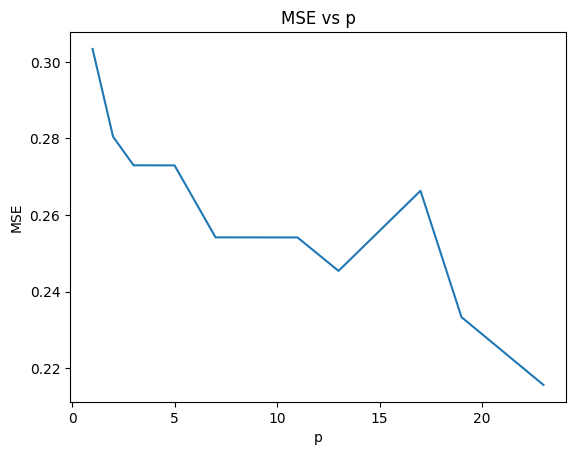

In [31]:
# plot a line graph with key as the index and value as the value



plt.plot(list(mse_scores.keys()),list(mse_scores.values()))
plt.xlabel("p")
plt.ylabel("MSE")
plt.title("MSE vs p")
plt.show()